## development notebook for model post-processing pipeline

In [116]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])?  y


In [117]:
import numpy as np
import matplotlib.pyplot as plt
import xarray as xr
import sys
import warnings
warnings.filterwarnings('ignore')

from importlib import reload
import glob
import os
import pandas as pd

plt.rcParams.update({'font.size': 12})
font = {'family' : 'normal',
'weight' : 'normal',
'size'   : 12}

plt.rc('font', **font)

## load relevant modules and dictionaries  

In [118]:
#### add the directory for the scripts, import list of models 
sys.path.append('/gpfs/home/mep22dku/scratch/AnalysisRobot/WORKSCRIPTS')
sys.path.append('/gpfs/home/mep22dku/scratch/AnalysisRobot/')
import cflx as cflx
import cflxPlotr as cP
import logr as log
import lom as lom

reload(cflx)
reload(cP)
reload(log)

<module 'logr' from '/gpfs/home/mep22dku/scratch/AnalysisRobot/WORKSCRIPTS/logr.py'>

## read files and perform rest of pipeline

analyzing TOM12_DW_WE43
results directory (/gpfs/home/mep22dku/scratch/AnalysisRobot/RobotPlots/TOM12_DW_WE43) already made
*** CFLX analysis initialized ***
compute complete, time taken (s): 0.014599323272705078
*** PLOTTING initialized
saving plot in /gpfs/home/mep22dku/scratch/AnalysisRobot/RobotPlots/TOM12_DW_WE43/CFLX_plot_TOM12_DW_WE43.jpg

analyzing TOM12_DW_GA01
results directory (/gpfs/home/mep22dku/scratch/AnalysisRobot/RobotPlots/TOM12_DW_GA01) already made
*** CFLX analysis initialized ***
compute complete, time taken (s): 0.00688934326171875
*** PLOTTING initialized
saving plot in /gpfs/home/mep22dku/scratch/AnalysisRobot/RobotPlots/TOM12_DW_GA01/CFLX_plot_TOM12_DW_GA01.jpg

analyzing TOM12_TJ_1ASA
results directory (/gpfs/home/mep22dku/scratch/AnalysisRobot/RobotPlots/TOM12_TJ_1ASA) already made
*** CFLX analysis initialized ***
compute complete, time taken (s): 0.003804445266723633
*** PLOTTING initialized
saving plot in /gpfs/home/mep22dku/scratch/AnalysisRobot/RobotPlo

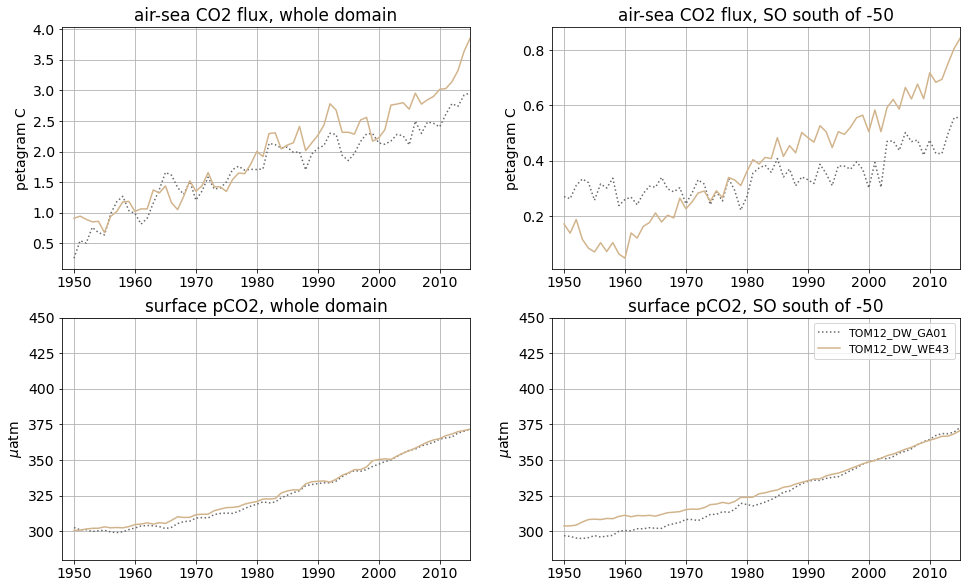

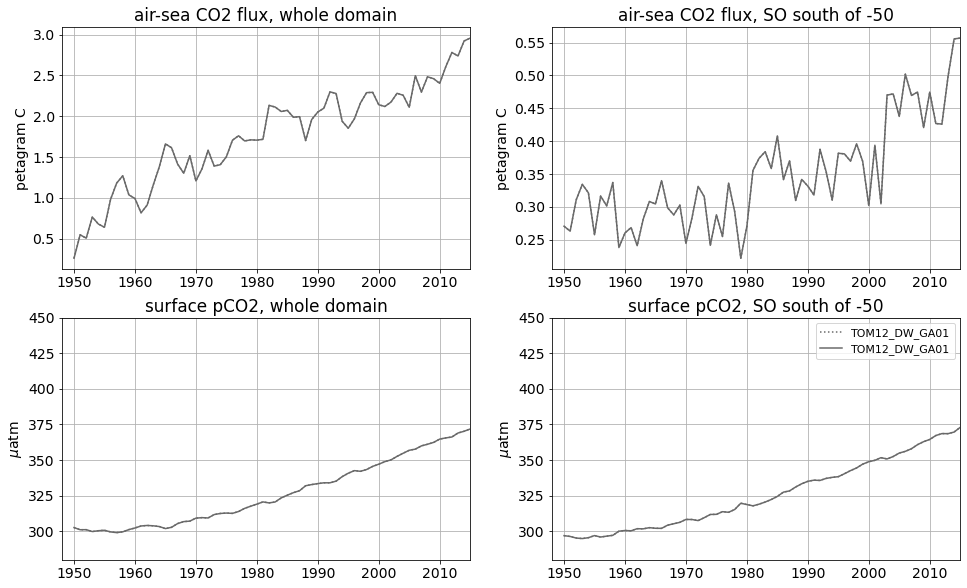

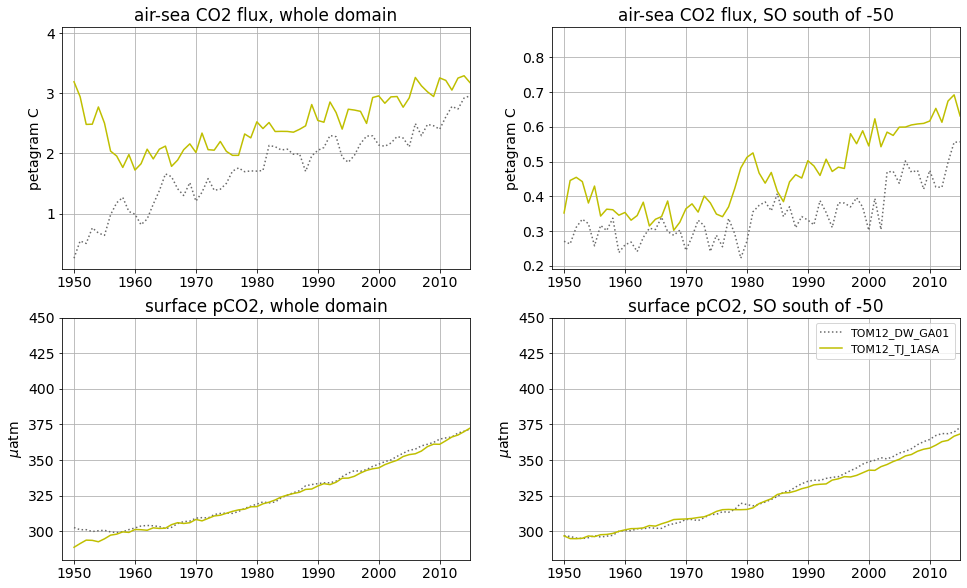

In [119]:
## define analysis options
## file in which we read 
ourModels = 'modelsToAnalyze.txt'
PLOT = True ##for each type of analysis, make the relevant plot
CFLX = True; # extract cflx 
endyear = 2015; endatm = 450 ## 
### read model details in as a pandas dataframe 

w = pd.read_csv(ourModels)
for i in range(0,len(w['model'])):
    tnam = (w['model'][i])
    syear = (w['yearstart'][i])
    eyear = (w['yearend'][i])
    print(f'analyzing {tnam}')
    
    ##write logs etc
    log.write_log(tnam, syear, eyear, PLOT, CFLX)
    tms, yst, yen, ls, cols, resdir = log.setupVarsAndStorageDir(tnam, syear, eyear)
    
    ### cflx analysis
    if CFLX:
        print('*** CFLX analysis initialized ***')
        cflx.breakdown_maker(tnam, fmi = syear, fmx = eyear, resDir = resdir)
        print('*** PLOTTING initialized')
        if PLOT: 
            dsets = []
            for i in range(0,len(tms)):
                tm = tms[i];
                ds = xr.open_dataset(glob.glob(f'/gpfs/home/mep22dku/scratch/AnalysisRobot/RobotPlots/{tm}/CFLX*{tm}*.nc')[0])
                dsets.append(ds); fnam = f'CFLX_plot_{tm}.jpg'
            cP.plot_carbon(dsets, cols, tms, ls, resdir, fnam, tstart=1948, tend=2015, tendatm=450)
    
    
    print('')

lol
